In [1]:
import numpy as np
import scipy.signal
import scipy.io
import matplotlib.pyplot as plt
import math
import scipy.optimize
import pandas as pd
from IPython.display import Audio
import csv

In [4]:
fs, centre = scipy.io.wavfile.read("timbale-test-position-micro-centre.wav")
fs2, excentre = scipy.io.wavfile.read("timbale-test-position-micro-excentre.wav")
assert fs==fs2

(80.0, 160.0)

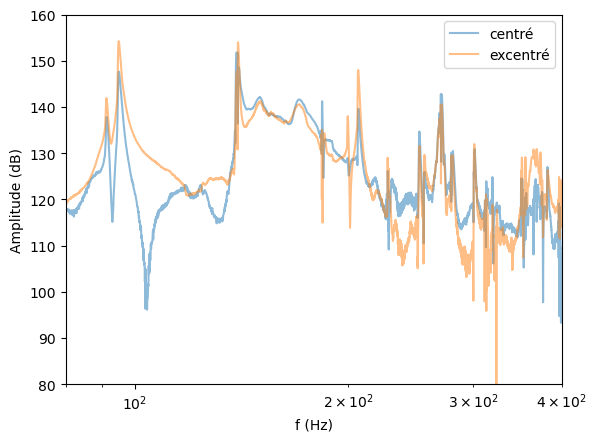

In [29]:
def nextpow2(N):
    n = 1
    while n < N: n *= 2
    return n
N = nextpow2(max(len(excentre), len(centre)))
freqs = np.fft.rfftfreq(N, 1/fs)
centre_fft = np.fft.rfft(centre, N)
excentre_fft = np.fft.rfft(excentre, N)
plt.xlabel("f (Hz)")
plt.ylabel("Amplitude (dB)")
plt.plot(freqs, 20*np.log10(abs(centre_fft)), alpha=0.5, label="centré")
plt.plot(freqs, 20*np.log10(abs(excentre_fft)), alpha=0.5, label="excentré")
plt.xlim(80,400)
plt.legend()
plt.xscale("log")
plt.ylim(80,160)